In [1]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from env_economic_choice_no_hold import EconomicChoiceEnv
from actor_critic_song import ActorCriticAgent
from reinforce_song import train_agent
from helper_functions import plot_metrics, plot_firing_rates, plot_psychometric_curve

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

print("Setup Complete.")

2025-05-16 18:00:19.308093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747411219.325722  461489 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747411219.331529  461489 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747411219.346426  461489 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747411219.346462  461489 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747411219.346464  461489 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' to sys.path
Setup Complete.


Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [10, 10, 20, 20]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 10000 episodes...


2025-05-16 18:00:50.755162: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Episode 100	Total Reward: -0.10	State [1. 0. 0. 0.]	Actor Loss: -0.0490	Critic Loss: 0.0018
Episode 200	Total Reward: 4.42	State [ 0.  -1.   0.2  0.1]	Actor Loss: 4.2237	Critic Loss: 19.1777
Episode 300	Total Reward: -0.09	State [1.  1.  0.1 0.1]	Actor Loss: -0.1550	Critic Loss: 0.0167
Episode 400	Total Reward: -0.09	State [0.  1.  0.2 0.1]	Actor Loss: -0.0281	Critic Loss: 0.0070
Episode 500	Total Reward: -0.09	State [ 0.  -1.   0.1  0.3]	Actor Loss: -0.0520	Critic Loss: 0.0163
Episode 600	Total Reward: -0.09	State [ 1.  -1.   0.1  0.3]	Actor Loss: -0.1132	Critic Loss: 0.0083
Episode 700	Total Reward: 2.21	State [0.  1.  1.  0.1]	Actor Loss: 0.6346	Critic Loss: 3.4867
Episode 800	Total Reward: 2.21	State [0.  1.  0.4 0.1]	Actor Loss: 0.1098	Critic Loss: 1.3124
Episode 900	Total Reward: 1.02	State [ 0.  -1.   0.1  0.1]	Actor Loss: -0.5340	Critic Loss: 0.1838
Episode 1000	Total Reward: 2.02	State [ 0.  -1.   0.   0.2]	Actor Loss: -0.0372	Critic Loss: 0.1714
Episode 1100	Total Reward: 2.2

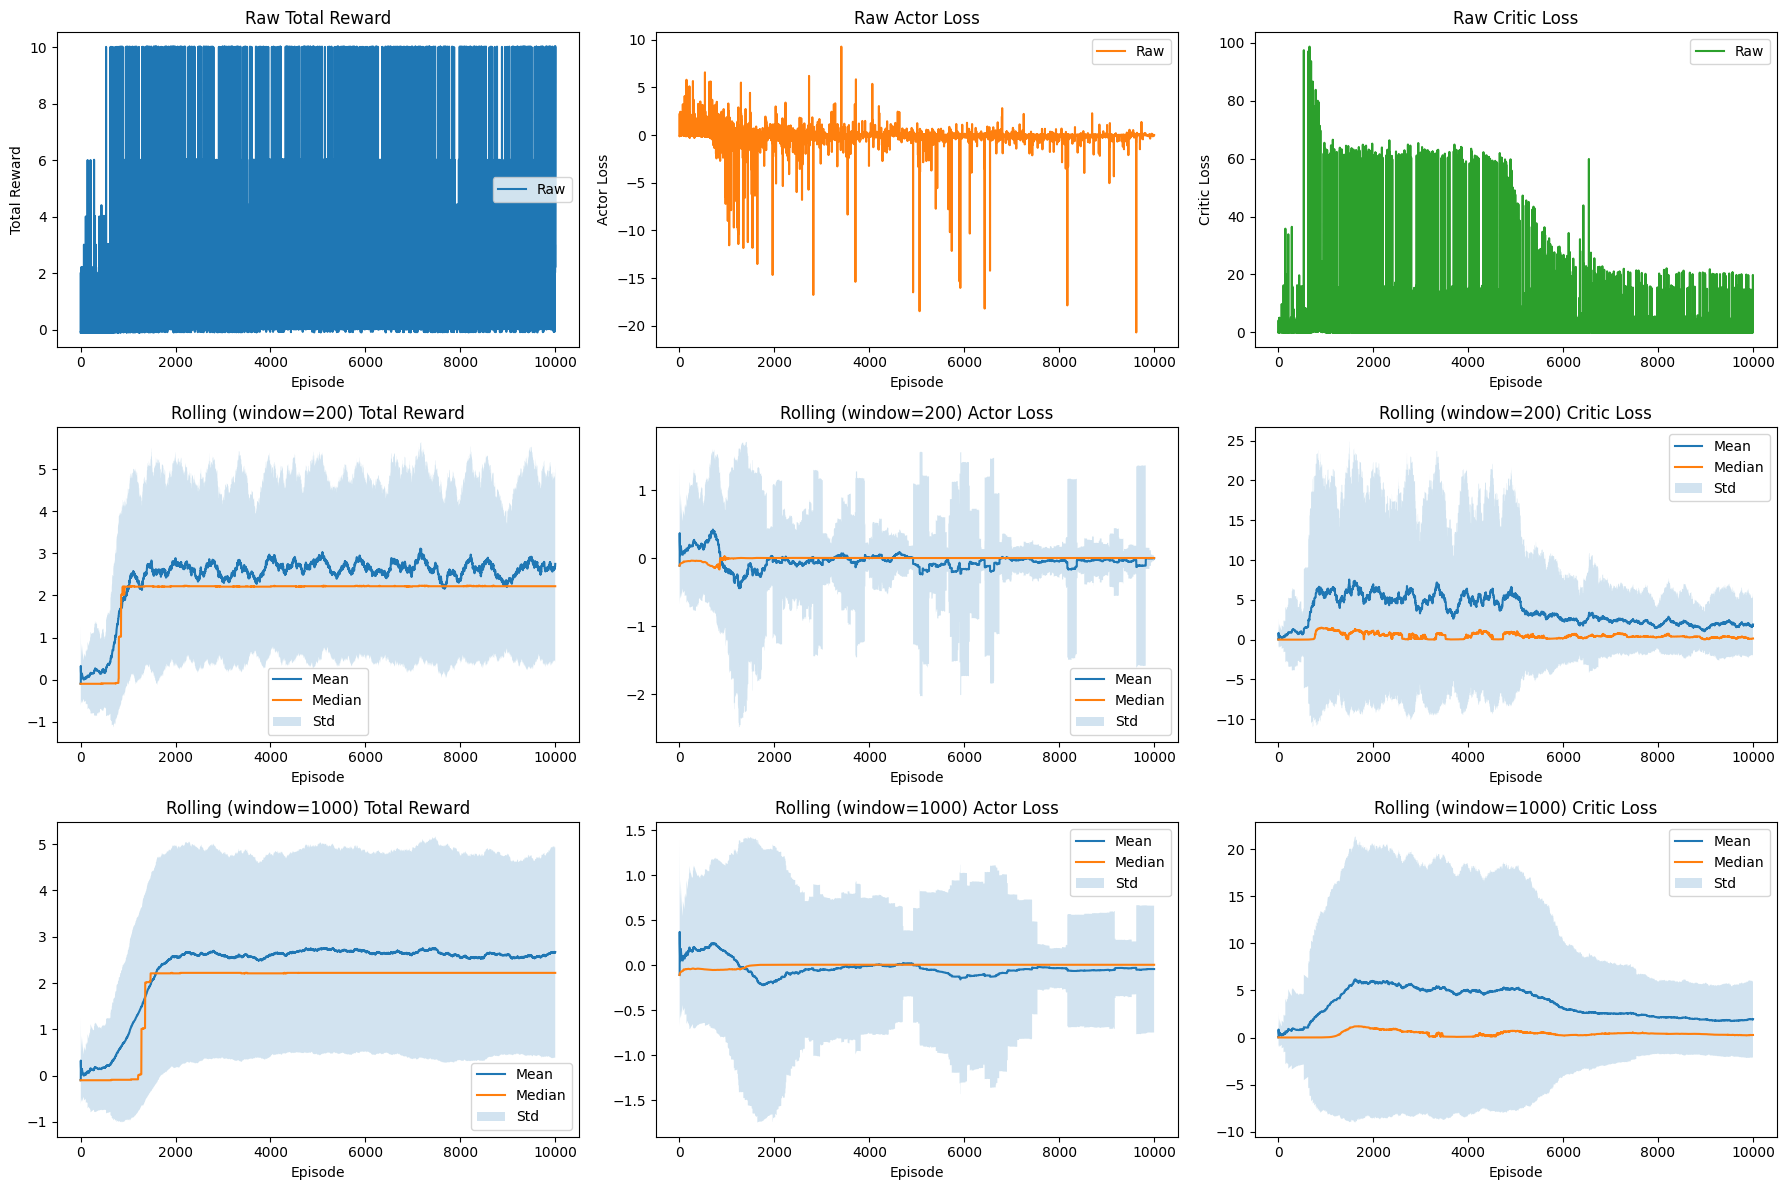

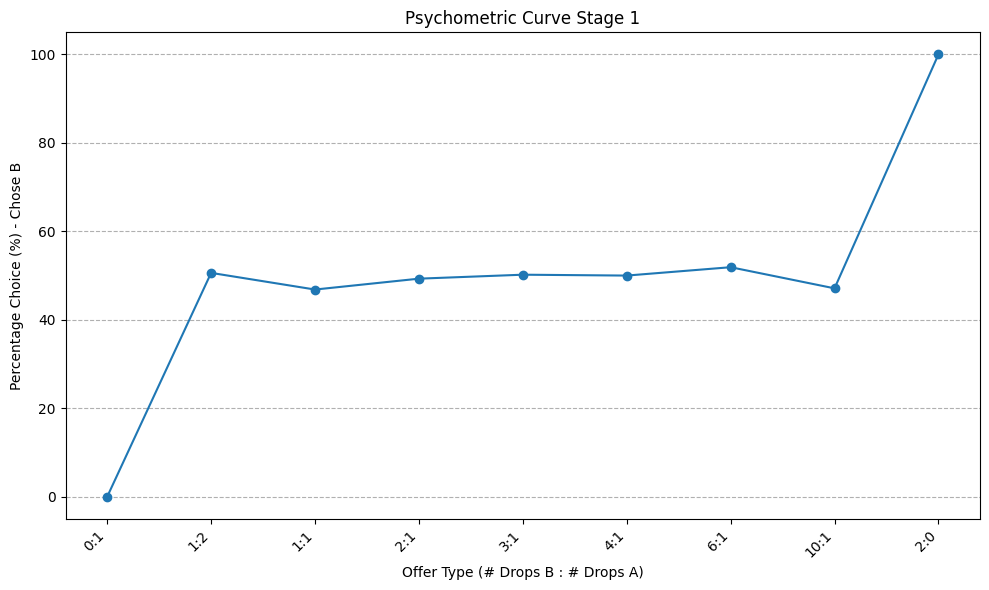

Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [10, 10, 20, 20],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, \
    actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Save checkpoint ---
    ckpt_dir = 'checkpoints/rnn_nohold_min_stage_1'
    os.makedirs(ckpt_dir, exist_ok=True)
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, ckpt_dir, max_to_keep=3)
    saved_path = manager.save()
    print(f"Checkpoint saved at: {saved_path}")

    # --- Dummy forward to create masks ---
    print("Performing dummy forward to create sparse masks...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    dummy_critic_input = tf.zeros(
        (1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Save Sparse Masks ---
    print("Saving masks for stage 1...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(
                os.path.join(ckpt_dir, f'stage1_actor_layer{i}_kernel.npy'),
                layer.kernel_constraint.mask.numpy()
            )
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(
                os.path.join(ckpt_dir, f'stage1_actor_layer{i}_recur.npy'),
                layer.recurrent_constraint.mask.numpy()
            )
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(
                os.path.join(ckpt_dir, f'stage1_critic_layer{i}_kernel.npy'),
                layer.kernel_constraint.mask.numpy()
            )
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(
                os.path.join(ckpt_dir, f'stage1_critic_layer{i}_recur.npy'),
                layer.recurrent_constraint.mask.numpy()
            )
    print("Masks saved for stage 1.")

    # --- Plot Training Metrics & Psychometric Curve ---
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )
    plot_psychometric_curve(
        measurements_juices,
        title="Psychometric Curve Stage 1"
    )

    # --- Close Environment ---
    print("Closing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [10, 10, 20, 20]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 1...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_min_stage_1/ckpt-1
Checkpoint restored successfully.
Starting training for 10000 episodes...
Episode 100	Total Reward: 10.02	State [ 0.  -1.   0.1  1. ]	Actor Loss: -0.0001	Critic Loss: 19.1802
Episode 200	Total Reward: 6.01	State [ 0.  -1.   0.1  0.6]	Actor Loss: 0.0317	Critic Loss: 3.6937
Episode 300	Total Reward: 2.23	State [0.  1.  0.  0.1]	Actor Loss: 0.0035	Critic Loss: 0.0301
Episode 400	Total Reward: 3.02	State [ 0.  -1.   0.1  0.3]	Actor Loss: 0.0008	Critic Loss: 0.6567
Episode 500	Total Reward: 2.23	State [0.  1.  0.1 0.1]	Actor Loss: -0.0041	Critic Loss: 0.0117
Episode 600	Total Reward: 2.22	State [0.  1.  0.1 0.1]	Actor Loss: 0.0029	Critic Loss: 0.0075
Episode 700	Total Reward: 0.02	State [0.  1.  0.2 0. ]	Actor Loss: -0.1199	Critic Loss: 4.9763
Episode 800	Total Reward: 2.23	State [0.  1.  0.2 0.1]	Actor Loss: 0.0036	Critic Loss: 0.0071
Episode 900	Total Reward: 6.01	State [ 0.  -1.   0.1  0.6]	Actor

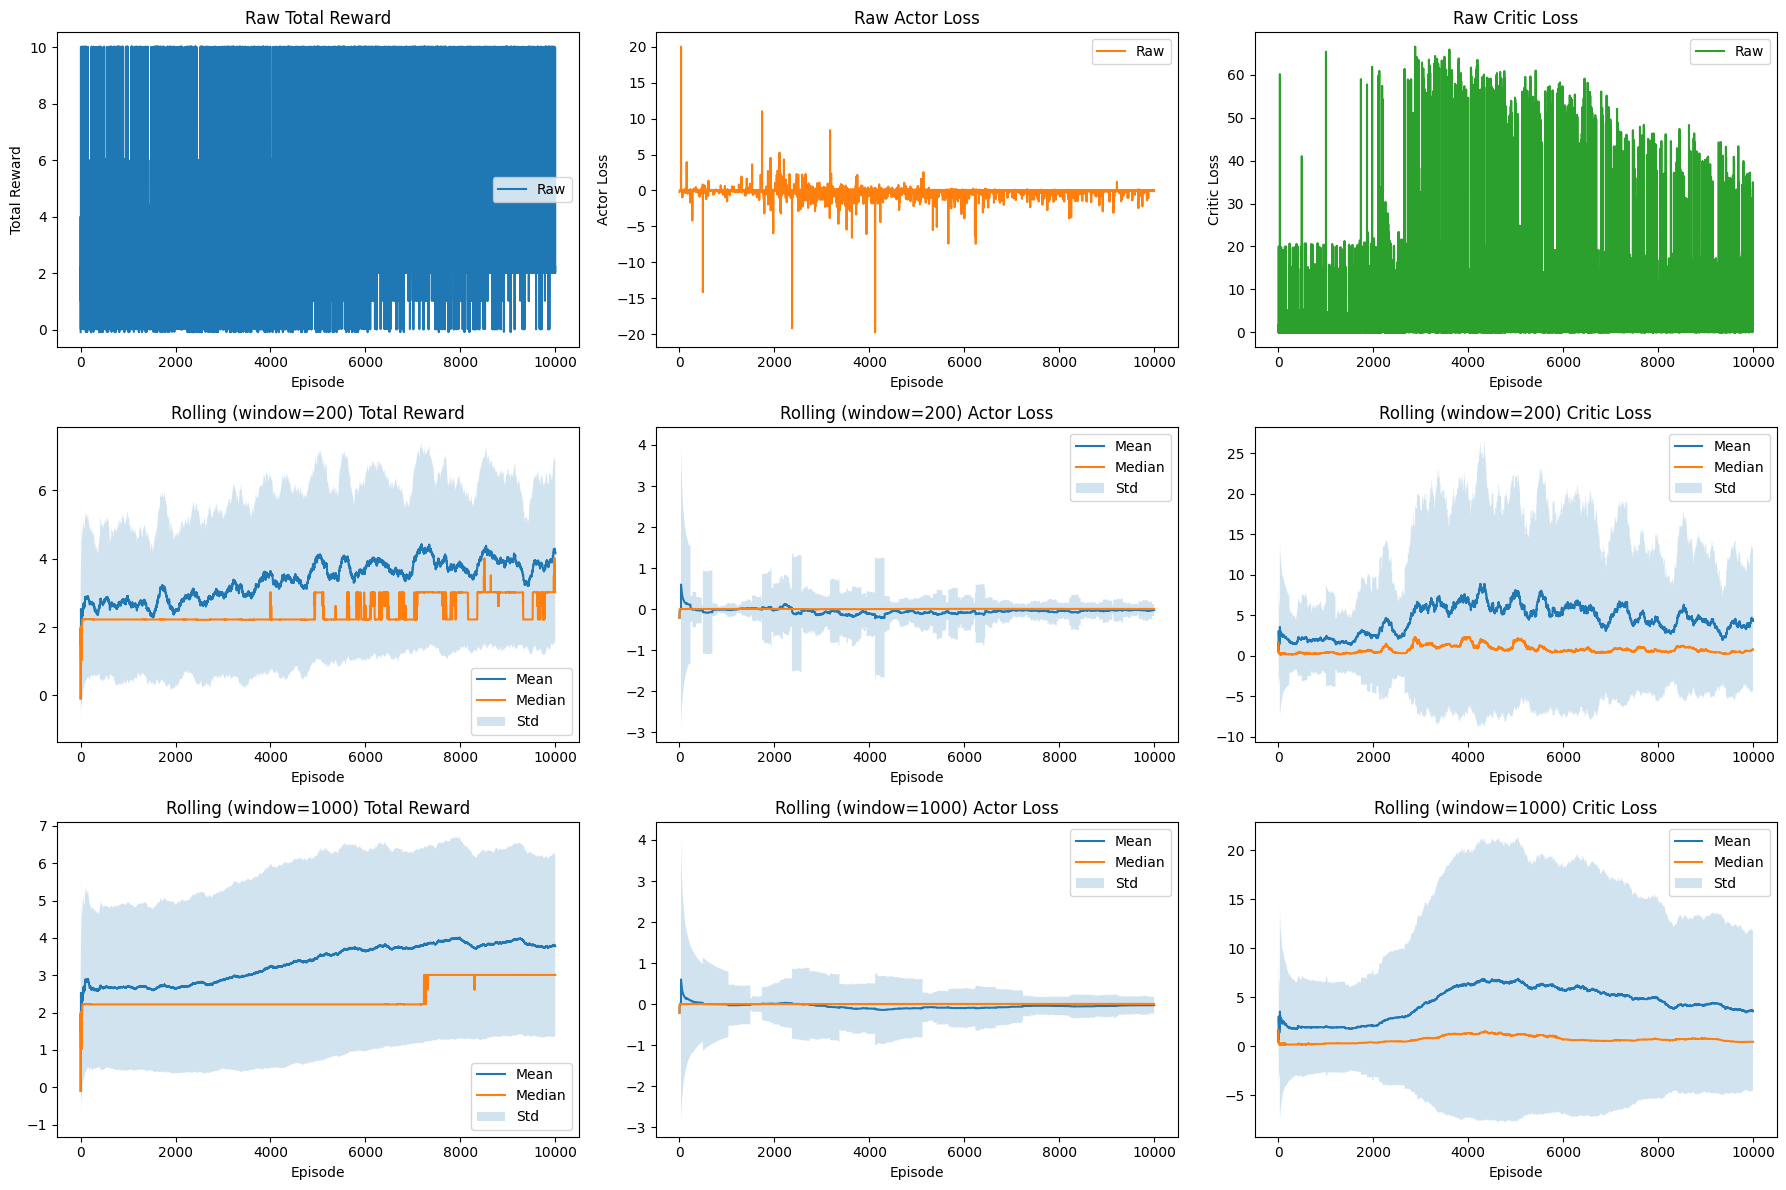

Plotting psychometric curve...


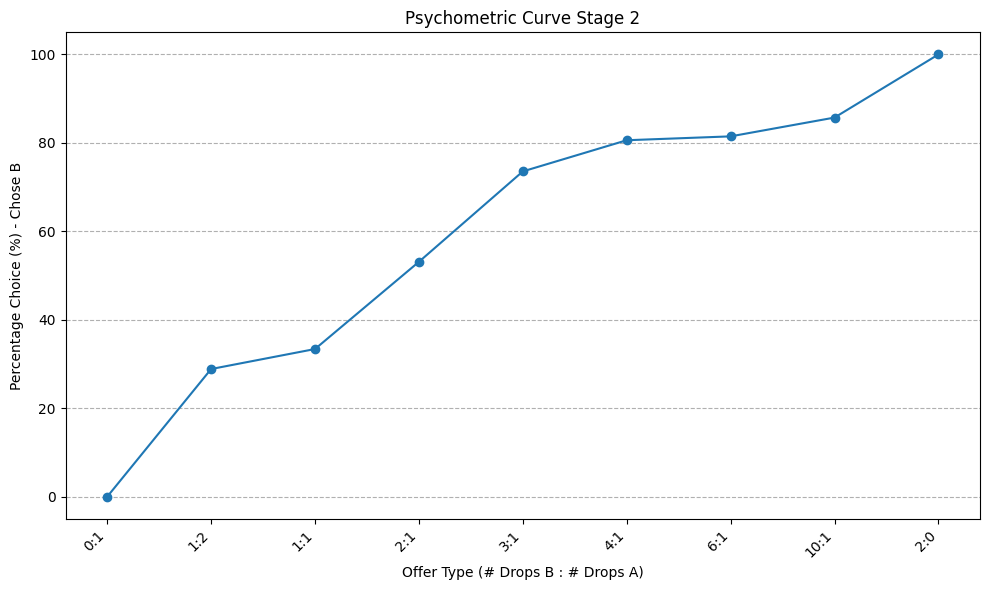

Closing environment...
Done.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [10, 10, 20, 20],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Directories ---
    prev_ckpt_dir = 'checkpoints/rnn_nohold_min_stage_1'
    this_ckpt_dir = 'checkpoints/rnn_nohold_min_stage_2'
    os.makedirs(this_ckpt_dir, exist_ok=True)

    # --- Build Networks ---
    actor_input_shape = (None, None, obs_size)
    critic_input_shape = (None, None, agent.actor.hidden_size + act_size)
    agent.actor.build(actor_input_shape)
    agent.critic.build(critic_input_shape)
    print("Actor and Critic networks built.")

    # --- Ensure layers are built (dummy forward) ---
    print("Performing dummy forward to build cells and weights for mask loading...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    dummy_critic_input = tf.zeros((1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Load Sparse Masks from Stage 1 ---
    print("Loading masks from stage 1...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        # Kernel mask
        kp = os.path.join(prev_ckpt_dir, f'stage1_actor_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            # Assign mask to constraint, matching the cell's input weight dtype
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        # Recurrent mask
        rp = os.path.join(prev_ckpt_dir, f'stage1_actor_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        kp = os.path.join(prev_ckpt_dir, f'stage1_critic_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        rp = os.path.join(prev_ckpt_dir, f'stage1_critic_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    print("Masks loaded.")

    # --- Dummy Step to Initialize Optimizers ---
    print("Initializing optimizers with dummy step...")
    dummy_obs = tf.zeros((1,1,obs_size), dtype=tf.float32)
    dummy_in = tf.zeros((1,1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        a_out, _ = agent.actor(dummy_obs, training=True)
        c_out, _ = agent.critic(dummy_in, training=True)
        loss_a = tf.reduce_mean(tf.square(a_out))
        loss_c = tf.reduce_mean(tf.square(c_out))
    grads_a = tape.gradient(loss_a, agent.actor.trainable_variables)
    grads_c = tape.gradient(loss_c, agent.critic.trainable_variables)
    agent.actor_optimizer.apply_gradients(zip(grads_a, agent.actor.trainable_variables))
    agent.critic_optimizer.apply_gradients(zip(grads_c, agent.critic.trainable_variables))
    del tape
    print("Optimizers initialized.")

    # --- Restore Checkpoint Stage 1 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, prev_ckpt_dir, max_to_keep=3)
    print(f"Restoring from checkpoint: {manager.latest_checkpoint}")
    status = ckpt.restore(manager.latest_checkpoint)
    status.assert_existing_objects_matched()
    print("Checkpoint restored successfully.")

    # --- Training Stage 2 ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards, actor_loss, critic_loss, firing_a, firing_c, juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 2 finished.")

    # --- Save Checkpoint Stage 2 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, this_ckpt_dir, max_to_keep=3)
    path = manager.save()
    print(f"Checkpoint stage 2 saved at: {path}")

    # --- Save Sparse Masks Stage 2 ---
    print("Saving masks for stage 2...")
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage2_actor_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage2_actor_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage2_critic_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage2_critic_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    print("Masks saved for stage 2.")

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards,
        actor_loss,
        critic_loss,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(juices, title="Psychometric Curve Stage 2")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()


Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [10, 10, 20, 20]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.003
  critic_lr: 0.003
  num_episodes: 10000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Loading masks from stage 2...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_nohold_min_stage_2/ckpt-1
Checkpoint restored successfully.
Starting training for 10000 episodes...
Episode 100	Total Reward: 2.01	State [0.  1.  0.2 0.1]	Actor Loss: -0.0178	Critic Loss: 0.1660
Episode 200	Total Reward: 2.21	State [0.  1.  0.1 0.1]	Actor Loss: 0.0056	Critic Loss: 0.1959
Episode 300	Total Reward: 2.22	State [ 0.  -1.   0.1  0.1]	Actor Loss: 0.0048	Critic Loss: 0.4698
Episode 400	Total Reward: 2.22	State [ 0.  -1.   0.1  0.1]	Actor Loss: 0.0064	Critic Loss: 0.0420
Episode 500	Total Reward: 6.02	State [ 0.  -1.   0.1  0.6]	Actor Loss: 0.0052	Critic Loss: 1.6962
Episode 600	Total Reward: 6.02	State [ 0.  -1.   0.1  0.6]	Actor Loss: 0.1038	Critic Loss: 3.7050
Episode 700	Total Reward: 4.42	State [0.  1.  0.1 0.2]	Actor Loss: 0.0078	Critic Loss: 4.0658
Episode 800	Total Reward: 2.22	State [0.  1.  0.2 0.1]	Actor Loss: -0.0

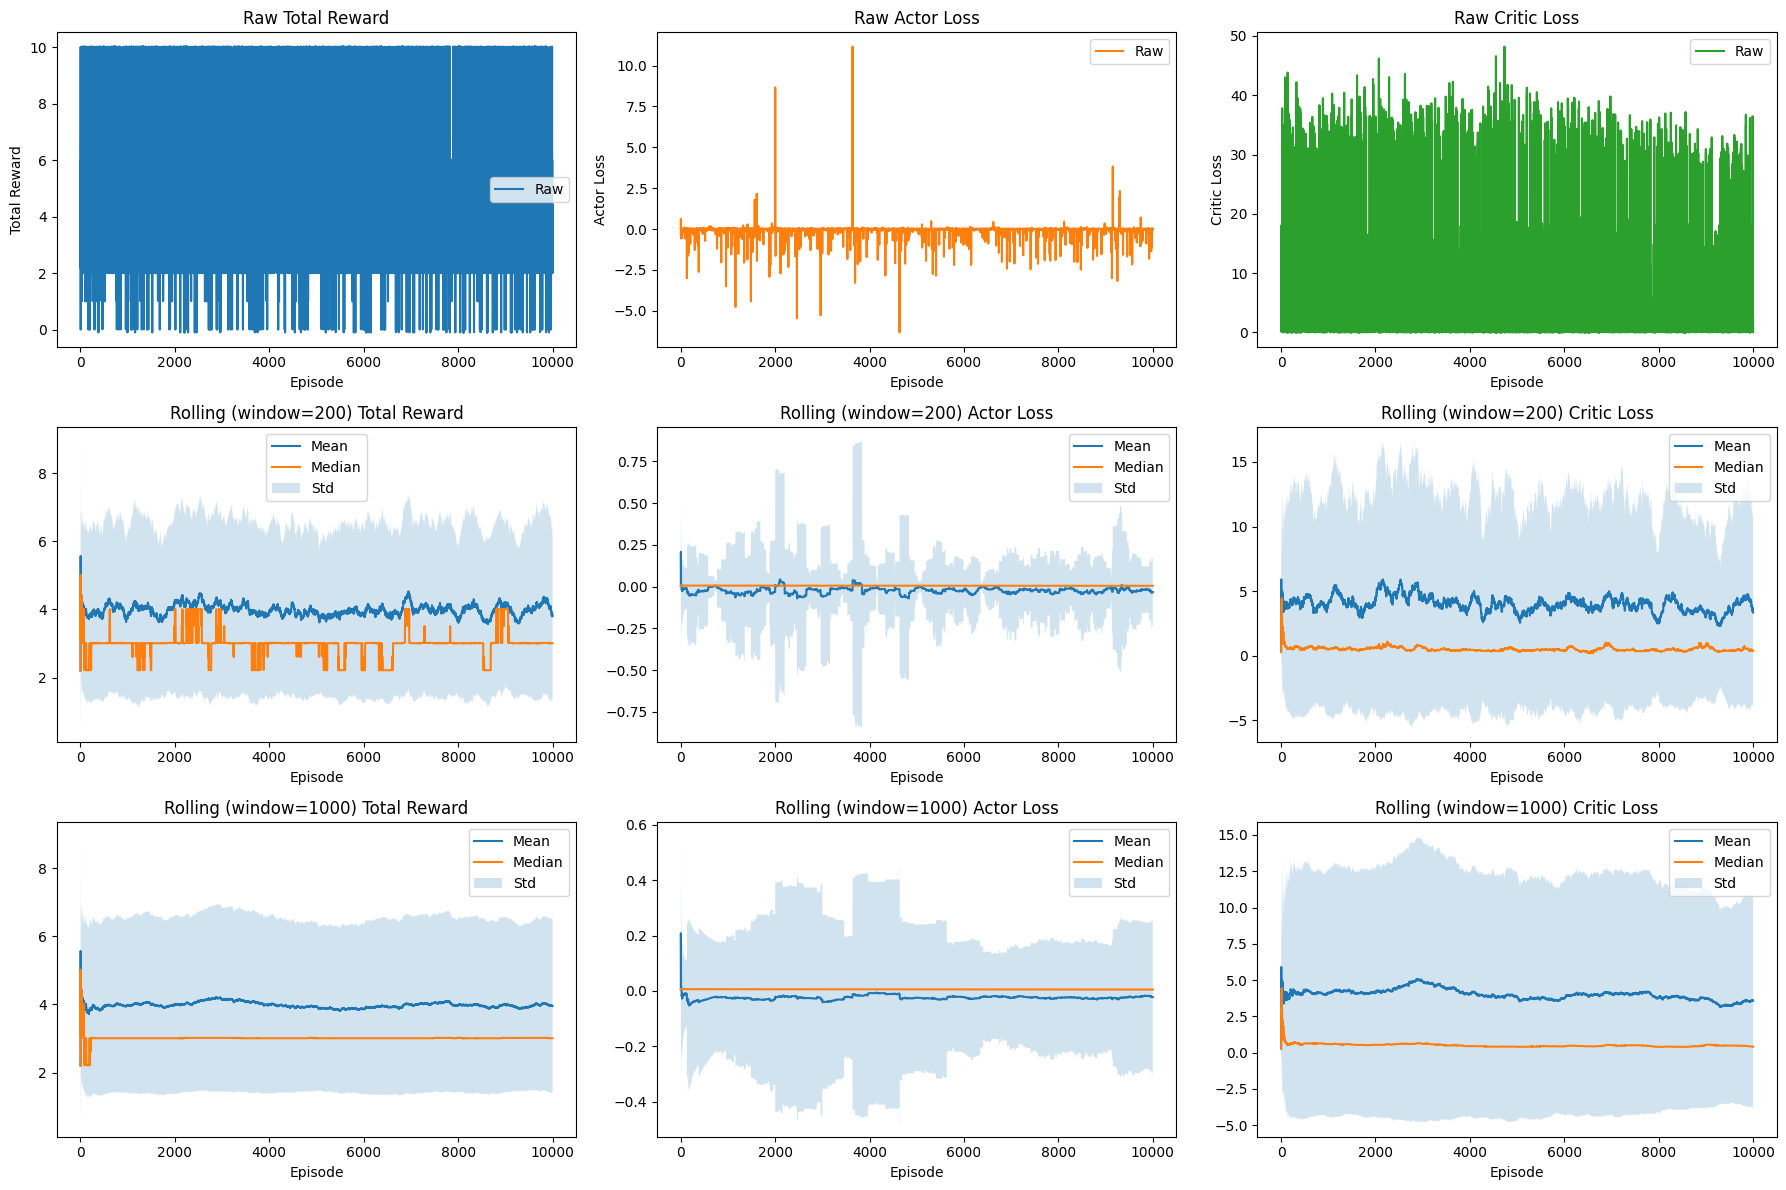

Plotting psychometric curve...


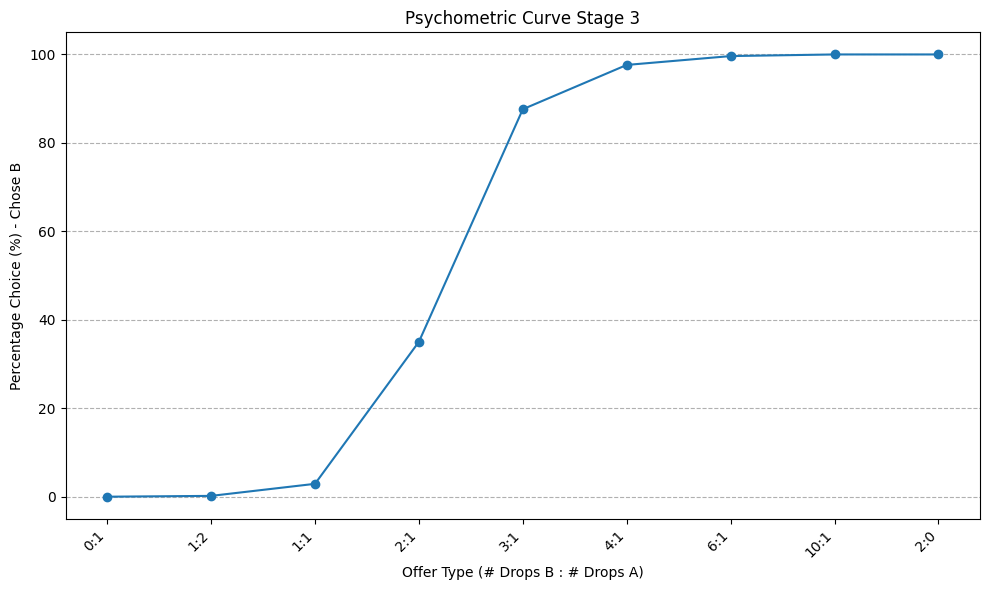

Closing environment...
Done.


In [4]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [10, 10, 20, 20],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 3e-3,
        "critic_lr": 3e-3,
        "num_episodes": 10000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Directories ---
    prev_ckpt_dir = 'checkpoints/rnn_nohold_min_stage_2'
    this_ckpt_dir = 'checkpoints/rnn_nohold_min_stage_3'
    os.makedirs(this_ckpt_dir, exist_ok=True)

    # --- Build Networks ---
    actor_input_shape = (None, None, obs_size)
    critic_input_shape = (None, None, agent.actor.hidden_size + act_size)
    agent.actor.build(actor_input_shape)
    agent.critic.build(critic_input_shape)
    print("Actor and Critic networks built.")

    # --- Ensure layers are built (dummy forward) ---
    print("Performing dummy forward to build cells and weights for mask loading...")
    dummy_obs = tf.zeros((1, 1, obs_size), dtype=tf.float32)
    _ = agent.actor(dummy_obs, training=False)
    dummy_critic_input = tf.zeros((1, 1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    _ = agent.critic(dummy_critic_input, training=False)

    # --- Load Sparse Masks from Stage 2 ---
    print("Loading masks from stage 2...")
    # Actor masks
    for i, layer in enumerate(agent.actor.hidden_layers):
        # Kernel mask
        kp = os.path.join(prev_ckpt_dir, f'stage2_actor_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            # Assign mask to constraint, matching the cell's input weight dtype
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        # Recurrent mask
        rp = os.path.join(prev_ckpt_dir, f'stage2_actor_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    # Critic masks
    for i, layer in enumerate(agent.critic.hidden_layers):
        kp = os.path.join(prev_ckpt_dir, f'stage2_critic_layer{i}_kernel.npy')
        if os.path.exists(kp) and layer.kernel_constraint is not None:
            mask_k = np.load(kp)
            layer.kernel_constraint.mask = tf.constant(mask_k, dtype=layer.cell.W_in.dtype)
        rp = os.path.join(prev_ckpt_dir, f'stage2_critic_layer{i}_recur.npy')
        if os.path.exists(rp) and hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None:
            mask_r = np.load(rp)
            layer.recurrent_constraint.mask = tf.constant(mask_r, dtype=layer.cell.W_rec.dtype)
    print("Masks loaded.")

    # --- Dummy Step to Initialize Optimizers ---
    print("Initializing optimizers with dummy step...")
    dummy_obs = tf.zeros((1,1,obs_size), dtype=tf.float32)
    dummy_in = tf.zeros((1,1, agent.actor.hidden_size + act_size), dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        a_out, _ = agent.actor(dummy_obs, training=True)
        c_out, _ = agent.critic(dummy_in, training=True)
        loss_a = tf.reduce_mean(tf.square(a_out))
        loss_c = tf.reduce_mean(tf.square(c_out))
    grads_a = tape.gradient(loss_a, agent.actor.trainable_variables)
    grads_c = tape.gradient(loss_c, agent.critic.trainable_variables)
    agent.actor_optimizer.apply_gradients(zip(grads_a, agent.actor.trainable_variables))
    agent.critic_optimizer.apply_gradients(zip(grads_c, agent.critic.trainable_variables))
    del tape
    print("Optimizers initialized.")

    # --- Restore Checkpoint Stage 2 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, prev_ckpt_dir, max_to_keep=3)
    print(f"Restoring from checkpoint: {manager.latest_checkpoint}")
    status = ckpt.restore(manager.latest_checkpoint)
    status.assert_existing_objects_matched()
    print("Checkpoint restored successfully.")

    # --- Training Stage 3 ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards, actor_loss, critic_loss, firing_a, firing_c, juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 3 finished.")

    # --- Save Checkpoint Stage 3 ---
    ckpt = tf.train.Checkpoint(
        actor=agent.actor,
        critic=agent.critic,
        actor_optimizer=agent.actor_optimizer,
        critic_optimizer=agent.critic_optimizer
    )
    manager = tf.train.CheckpointManager(ckpt, this_ckpt_dir, max_to_keep=3)
    path = manager.save()
    print(f"Checkpoint stage 3 saved at: {path}")

    # --- Save Sparse Masks Stage 3 ---
    print("Saving masks for stage 3...")
    for i, layer in enumerate(agent.actor.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage3_actor_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage3_actor_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    for i, layer in enumerate(agent.critic.hidden_layers):
        if layer.kernel_constraint is not None and layer.kernel_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage3_critic_layer{i}_kernel.npy'), layer.kernel_constraint.mask.numpy())
        if hasattr(layer, 'recurrent_constraint') and layer.recurrent_constraint is not None and layer.recurrent_constraint.mask is not None:
            np.save(os.path.join(this_ckpt_dir, f'stage3_critic_layer{i}_recur.npy'), layer.recurrent_constraint.mask.numpy())
    print("Masks saved for stage 3.")

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards,
        actor_loss,
        critic_loss,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(juices, title="Psychometric Curve Stage 3")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()